<a href="https://colab.research.google.com/github/RhyanMorais/license-plate-recognition-br/blob/main/02_machine_learning_cancer_severity_analysis_2015_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Aplicada à Análise dos Fatores Associados à Severidade do Câncer (2015–2024)


# Importações

In [5]:
# Fundamentais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Visualização de Árvore
from sklearn.tree import plot_tree

# Divisão
from sklearn.model_selection import train_test_split

# Pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Modelos Regressores
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# Modelos Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Carregamento de Dados

In [6]:
DATA_FILE = "global_cancer_patients_2015_2024.csv"

data_path = Path("data") / DATA_FILE

if not data_path.exists():
    raise FileNotFoundError(
        "Arquivo não encontrado. Coloque o CSV na pasta data/ "
        "na raiz do projeto."
    )

df = pd.read_csv(data_path)
df.head()


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


# Codificação e limpeza de Dados

In [7]:
df = df.drop(['Patient_ID'], axis=1) # Tirando váriavel patientID pois não faz sentido ser analisada (apenas um registro unico por paciente)

In [8]:
# Codificando váriaveis objects

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

ordem = [['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']]
ord_enc = OrdinalEncoder(categories=ordem)
df[['Cancer_Stage']] = ord_enc.fit_transform(df[['Cancer_Stage']])

df = pd.get_dummies(df, columns=['Country_Region', 'Cancer_Type'], drop_first=True)

In [9]:
X = df.drop(['Target_Severity_Score','Treatment_Cost_USD'], axis=1) # Tirando váriavel resposta e custo de tratamento, pois não convém serem analisadas como váriaveis explicativas
y = df['Target_Severity_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20) # Divisão do dataset para modelos classificadores
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X, y, test_size = 0.2, random_state = 20) # Divisão do dataset para modelos regressores

# Definição de Faixas para Modelos de Classificação

In [10]:
# Ainda que, de início, o problema seja de regressão, definiremos faixas para testar modelos de classificação.
# Após isso, também usaremos os modelos regressores sem as faixas

def faixas(target):
  if target <= 4.4:
    return 0
  elif 4.4 < target <= 5.49:
    return 1
  else:
    return 2

y_train = y_train.apply(faixas)
y_test = y_test.apply(faixas)

# Padronização de Dados

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_B_scaled = scaler.fit_transform(X_train_B)
X_test_B_scaled = scaler.transform(X_test_B)

# Implemetação de Modelos de Classificação

In [12]:
# Regressão Logística
RLog = LogisticRegression(max_iter=500,random_state=20)
RLog.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=20)

In [13]:
# Árvore de Decisão
DTree = DecisionTreeClassifier(max_depth=8, random_state=20)
DTree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=8, random_state=20)

In [14]:
# Floresta Aleatória
RForest = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=20, class_weight='balanced')
RForest.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       random_state=20)

In [15]:
# SGD
SGD = SGDClassifier(random_state=20)
SGD.fit(X_train_scaled, y_train)

SGDClassifier(random_state=20)

In [16]:
# Dicionário de Modelos
modelos = {
    'Regressão Logística': RLog,
    'Árvore de Decisão': DTree,
    'Floresta Aleatória': RForest,
    'SGD': SGD
}

# Resultados - Modelos Classificadores

In [17]:
for nome, modelo in modelos.items():
  y_pred = modelo.predict(X_test_scaled)
  print(f'{nome}:')
  print("Acurácia:", round(accuracy_score(y_test, y_pred)*100, 2))
  print(classification_report(y_test, y_pred))
  print('-----------------------------------------')

Regressão Logística:
Acurácia: 70.87
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      3312
           1       0.57      0.59      0.58      3442
           2       0.78      0.78      0.78      3246

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

-----------------------------------------
Árvore de Decisão:
Acurácia: 67.0
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      3312
           1       0.53      0.58      0.55      3442
           2       0.76      0.73      0.74      3246

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.68     10000
weighted avg       0.68      0.67      0.67     10000

-----------------------------------------
Floresta Aleatória:
Acurácia: 69.63
              precision    recall  f1-score   s

# Implementação de Modelos de Regressão

In [18]:
# Regressão Linear
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_B_scaled, y_train_B)

LinearRegression()

In [19]:
# Árvore de Decisão Regressora
tree_regressor = DecisionTreeRegressor(max_depth=9, random_state=20)
tree_regressor.fit(X_train_B_scaled, y_train_B)

DecisionTreeRegressor(max_depth=9, random_state=20)

In [20]:
# Floresta Aleatória Regressora
forest_regressor = RandomForestRegressor(n_estimators=200, random_state=20)
forest_regressor.fit(X_train_B_scaled, y_train_B)

RandomForestRegressor(n_estimators=200, random_state=20)

In [21]:
# SGD Regressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=20)
sgd_regressor.fit(X_train_B_scaled, y_train_B)

SGDRegressor(random_state=20)

In [22]:
# Dicionário de Modelos
modelos_regressao = {
    'Regressão Linear': linear_regressor,
    'Árvore de Decisão': tree_regressor,
    'Floresta Aleatória': forest_regressor,
    'SGD Regressor': sgd_regressor
}

# Resultados - Modelos Regressores

In [23]:
for nome, modelo in modelos_regressao.items():
    y_pred_B = modelo.predict(X_test_B_scaled)
    print(f"{nome}:")
    print("MAE:", round(mean_absolute_error(y_test_B, y_pred_B) * 100, 2))
    print("MSE:", round(mean_squared_error(y_test_B, y_pred_B) * 100, 2))
    print("R²:", round(r2_score(y_test_B, y_pred_B) * 100, 2))
    print('-----------------------------------------')

Regressão Linear:
MAE: 48.0
MSE: 30.49
R²: 79.58
-----------------------------------------
Árvore de Decisão:
MAE: 54.08
MSE: 42.04
R²: 71.84
-----------------------------------------
Floresta Aleatória:
MAE: 49.4
MSE: 33.27
R²: 77.72
-----------------------------------------
SGD Regressor:
MAE: 48.13
MSE: 30.77
R²: 79.39
-----------------------------------------


# Visualizar a Árvore de Decisão após o loop

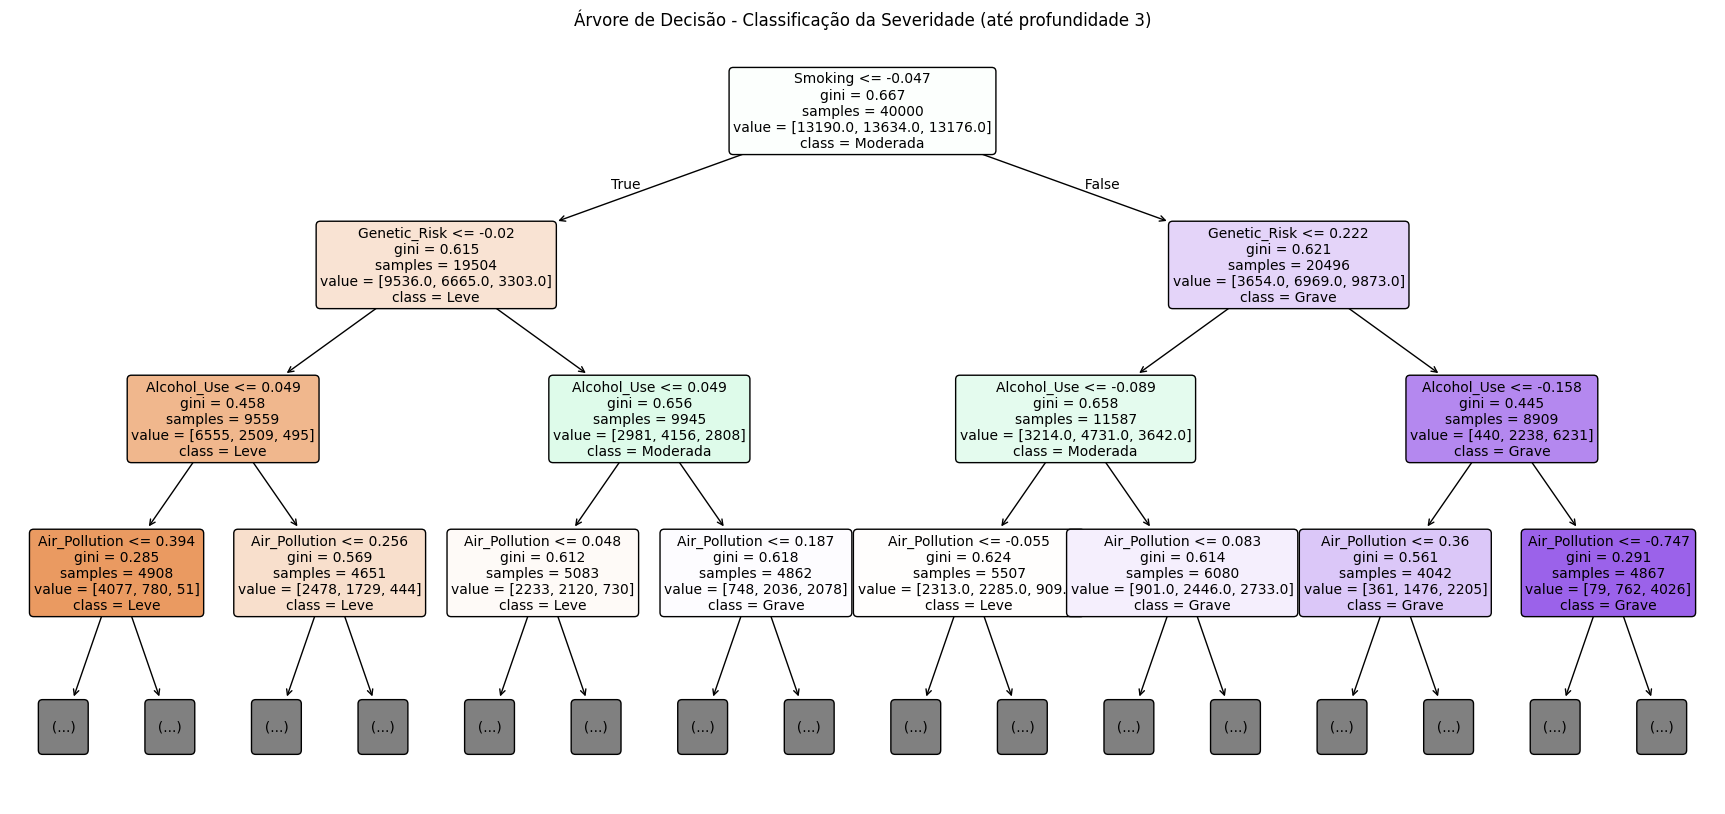

In [24]:
dt_model = modelos['Árvore de Decisão']

plt.figure(figsize=(22, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Leve', 'Moderada', 'Grave'],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3  # Limita a visualização aos primeiros 3 níveis da árvore
)
plt.title("Árvore de Decisão - Classificação da Severidade (até profundidade 3)")
plt.show()

# Análise de Dados

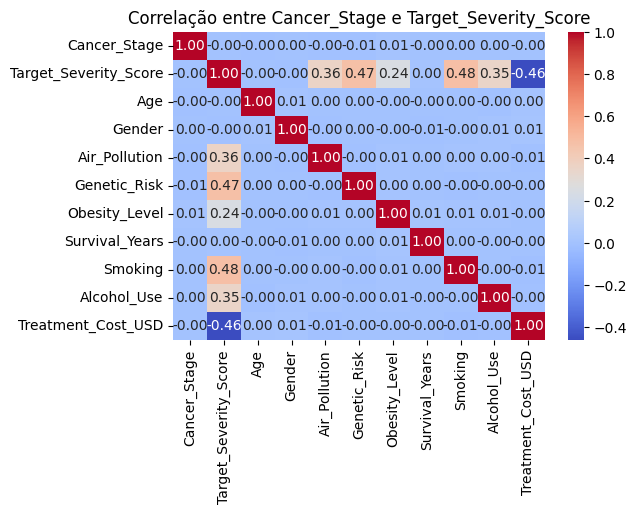

In [25]:
corr = df[['Cancer_Stage', 'Target_Severity_Score', 'Age', 'Gender', 'Air_Pollution',
           'Genetic_Risk', 'Obesity_Level', 'Survival_Years' ,'Smoking', 'Alcohol_Use',
           'Treatment_Cost_USD']].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Cancer_Stage e Target_Severity_Score')
plt.show()

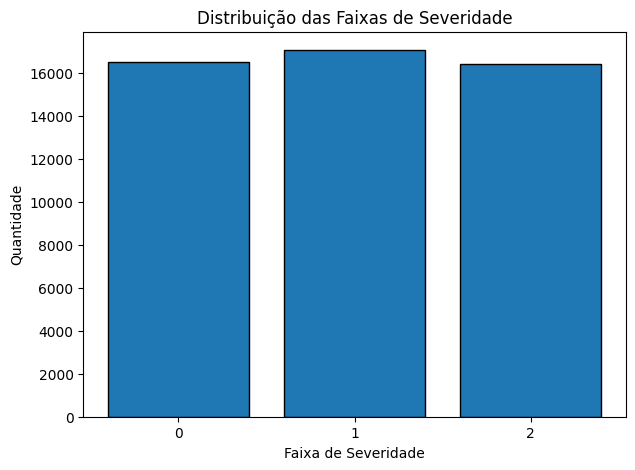

In [26]:
plt.figure(figsize=(7, 5))
plt.hist(pd.concat([y_train, y_test]), bins=[-0.5, 0.5, 1.5, 2.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1, 2])
plt.title('Distribuição das Faixas de Severidade')
plt.xlabel('Faixa de Severidade')
plt.ylabel('Quantidade')
plt.show()

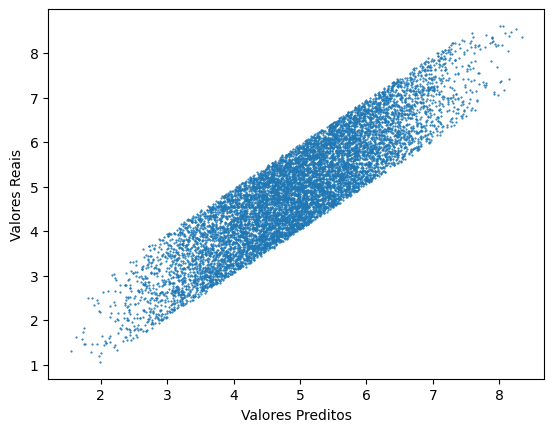

In [27]:
# Gáfico de Regressão Linear. Predito vs Real
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_B_scaled, y_train_B)
LR_pred = linear_regressor.predict(X_test_B_scaled)


LR_pred = np.array(LR_pred)
y_test_B = np.array(y_test_B)

indices_ordenados = np.argsort(LR_pred)

y_pred_ordenado = LR_pred[indices_ordenados]
y_test_ordenado = y_test_B[indices_ordenados]

plt.scatter(y_pred_ordenado, y_test_ordenado, s=0.3)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()
